# ANIRUDH SINGH CHAUHAN 181B035

1. Download the csv file for time series data about Covid-19 cases in India.
2. Pre-process the data to check about any missing data.
3. Plot the time series to visualise it.
4. Identify the trend, seasonality and remainder parts of the time series.
5. Identify the SARIMAX parameters
6. Forecast the time series for next 100 days.
7. Plot your forecasted data along with the original data.

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_csv("covid_19_india.csv")

In [3]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [4]:
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana',
       'Telangana***', 'Telengana***', 'Maharashtra***', 'Chandigarh***',
       'Punjab***'], dtype=object)

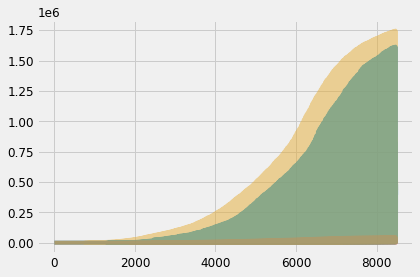

In [5]:
df['Cured'].plot(alpha=0.8)
df['Deaths'].plot(alpha=0.3)
df['Confirmed'].plot(alpha=0.5)
plt.show()

In [6]:
#x = pd.DataFrame(df.groupby('State/UnionTerritory')['Confirmed'].value_counts().sort_values(ascending = False))

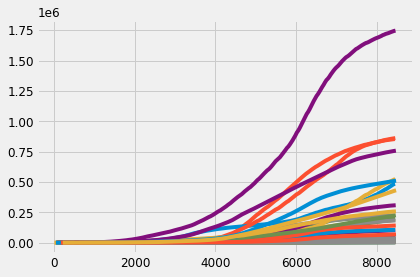

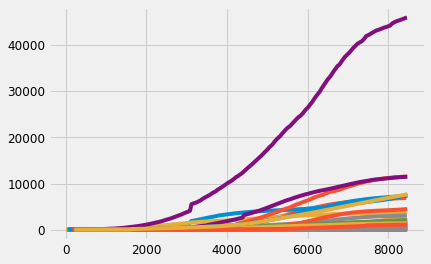

In [7]:
df.groupby('State/UnionTerritory')['Confirmed'].plot()
plt.show()
df.groupby('State/UnionTerritory')['Deaths'].plot()
plt.show()

In [8]:
df['Date'].min(), df['Date'].max()

('01/02/20', '31/10/20')

In [9]:
Raj = df.loc[df['State/UnionTerritory'] == 'Rajasthan']
Raj.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
36,37,03/03/20,6:00 PM,Rajasthan,0,1,0,0,1
44,45,04/03/20,6:00 PM,Rajasthan,1,14,0,0,15
48,49,05/03/20,6:00 PM,Rajasthan,1,14,0,0,15
54,55,06/03/20,6:00 PM,Rajasthan,1,14,0,0,15
64,65,07/03/20,6:00 PM,Rajasthan,1,14,0,0,15


In [10]:
Raj.shape

(259, 9)

In [11]:
Raj.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [12]:
Raj.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [13]:
cols=['Sno', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths']
Raj['Date'] = Raj['Date']+' '+Raj['Time']
Raj.drop(cols, axis=1, inplace=True)
Raj= Raj.sort_values('Date')
Raj.isnull().sum()

Date         0
Confirmed    0
dtype: int64

In [14]:
Raj.head()

,Date,Confirmed
552,01/04/20 7:30 PM,93
1503,01/05/20 5:00 PM,2584
2549,01/06/20 8:00 AM,8831
3630,01/07/20 8:00 AM,18014
4733,01/08/20 8:00 AM,41298


In [15]:
Raj.index

Int64Index([ 552, 1503, 2549, 3630, 4733, 5818, 6868, 7953,  581, 1535,
            ...
            3594, 4663, 5748, 6833, 7883,  522, 2513, 4698, 5783, 7918],
           dtype='int64', length=259)

In [16]:
len(Raj)

259

In [17]:
Raj = Raj.groupby('Date')['Confirmed'].sum().reset_index()


In [18]:
Raj = Raj.set_index('Date')
Raj.index = pd.to_datetime(Raj.index)
Raj.index

DatetimeIndex(['2020-01-04 19:30:00', '2020-01-05 17:00:00',
               '2020-01-06 08:00:00', '2020-01-07 08:00:00',
               '2020-01-08 08:00:00', '2020-01-09 08:00:00',
               '2020-01-10 08:00:00', '2020-01-11 08:00:00',
               '2020-02-04 18:00:00', '2020-02-05 17:00:00',
               ...
               '2020-06-30 08:00:00', '2020-07-30 08:00:00',
               '2020-08-30 08:00:00', '2020-09-30 08:00:00',
               '2020-10-30 08:00:00', '2020-03-31 20:30:00',
               '2020-05-31 08:00:00', '2020-07-31 08:00:00',
               '2020-08-31 08:00:00', '2020-10-31 08:00:00'],
              dtype='datetime64[ns]', name='Date', length=259, freq=None)

In [19]:
y = Raj['Confirmed'].resample('W').mean()

In [20]:
y.index

DatetimeIndex(['2020-01-05', '2020-01-12', '2020-01-19', '2020-01-26',
               '2020-02-02', '2020-02-09', '2020-02-16', '2020-02-23',
               '2020-03-01', '2020-03-08', '2020-03-15', '2020-03-22',
               '2020-03-29', '2020-04-05', '2020-04-12', '2020-04-19',
               '2020-04-26', '2020-05-03', '2020-05-10', '2020-05-17',
               '2020-05-24', '2020-05-31', '2020-06-07', '2020-06-14',
               '2020-06-21', '2020-06-28', '2020-07-05', '2020-07-12',
               '2020-07-19', '2020-07-26', '2020-08-02', '2020-08-09',
               '2020-08-16', '2020-08-23', '2020-08-30', '2020-09-06',
               '2020-09-13', '2020-09-20', '2020-09-27', '2020-10-04',
               '2020-10-11', '2020-10-18', '2020-10-25', '2020-11-01',
               '2020-11-08', '2020-11-15', '2020-11-22', '2020-11-29',
               '2020-12-06', '2020-12-13'],
              dtype='datetime64[ns]', name='Date', freq='W-SUN')

In [21]:
y.fillna(method='ffill',inplace=True)
y['2020':]

Date
2020-01-05      1338.500000
2020-01-12     80353.500000
2020-01-19     80353.500000
2020-01-26     80353.500000
2020-02-02     80353.500000
2020-02-09     25979.166667
2020-02-16    168116.000000
2020-02-23    168116.000000
2020-03-01    168116.000000
2020-03-08     12463.166667
2020-03-15     70812.500000
2020-03-22        11.000000
2020-03-29        41.000000
2020-04-05       646.800000
2020-04-12     83995.333333
2020-04-19      1061.428571
2020-04-26      1832.285714
2020-05-03      1852.800000
2020-05-10     44451.571429
2020-05-17     37777.500000
2020-05-24      6004.571429
2020-05-31      7802.285714
2020-06-07      6739.000000
2020-06-14     85516.500000
2020-06-21     13568.857143
2020-06-28     15956.857143
2020-07-05      7710.200000
2020-07-12     87814.000000
2020-07-19     26399.857143
2020-07-26     32318.142857
2020-08-02     38082.000000
2020-08-09     25495.142857
2020-08-16     98681.666667
2020-08-23     65289.857143
2020-08-30     74674.428571
2020-09-06     

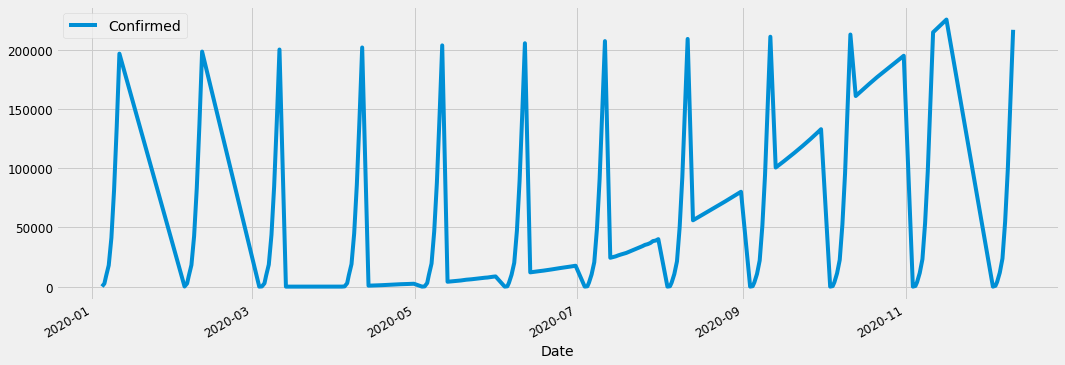

In [22]:
Raj.plot(figsize=(16, 6))
plt.show()

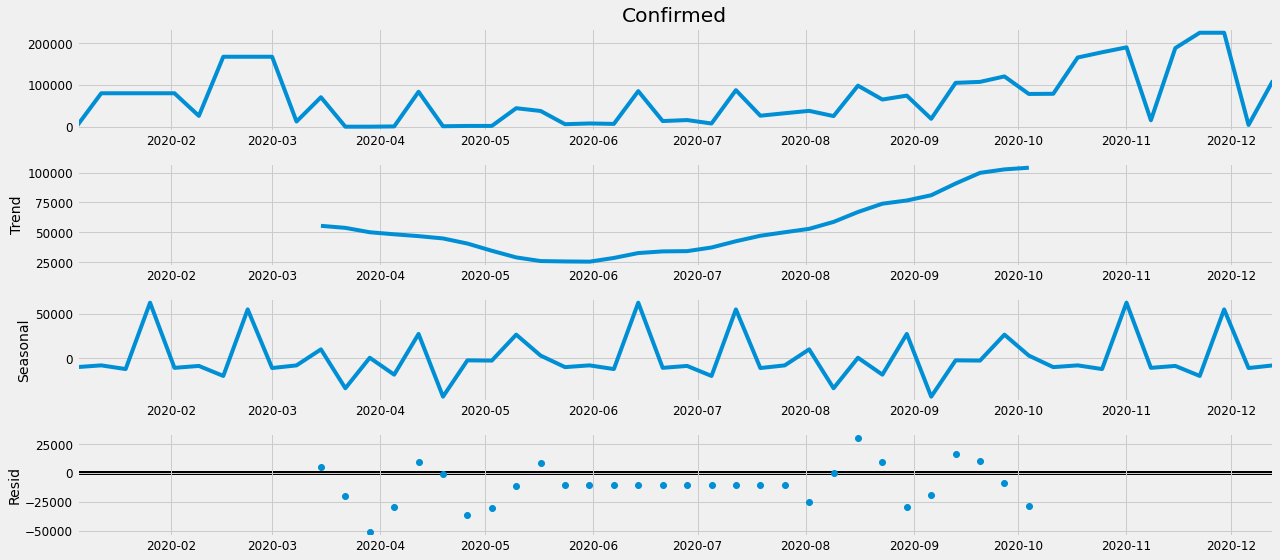

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, freq = 20, model='additive')
fig = decomposition.plot()
plt.show()

In [24]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [25]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1266.4877155695362
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:966.2649396389204
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:955.6162517751707
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:646.0274990380432
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:975.9742765748399
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:947.4915696208983
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:671.3388096714552
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:670.3595105418002
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1227.2372546079337
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:923.7791079875166
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:927.5585944334634
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:620.0464090558112
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:972.9210232524125
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:917.1349416275007
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:668.8550023191997
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:620.2165462656912
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1210.993394407899
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:57152.300848616374
ARIMA(0

H:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:929.3706283506243
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:905.2736281095928
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:641.6096165394958


H:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:nan
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1171.9570544279636
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:893.1596082152818
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:899.6195272509264
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:2135.834320971797
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:918.0798696587306
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:870.6888987318662
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:639.8110610639958
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:989.9073319671782
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1231.819041176111
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:930.9422318566891
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:951.2912274397671
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:639.5730512489255
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:929.3429817681082


H:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:926.8361783279247
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:640.031615918507
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:635.2954105945133
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1198.8601452444618
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:892.9099602130555
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:924.5449142329287
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:609.9444901878694
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:919.5008963223547
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:928.6579145937397
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:640.8092215989955
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:608.4553942927691
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1204.403271401195
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:50003.932613219404
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:930.2582233618156
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2228.779630975379
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:903.2761412059984
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:902.8229212279255
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:617.3396043559487


H:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:996.6637628144343
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1173.6308815669265
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:49762.22828605859
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:901.5866715072476
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:2137.8329515035957
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:895.5303414639775
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:873.9383673121932
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:616.415930859787
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:952.6594830213904


H:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [26]:
#ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:608.4553942927691

In [27]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

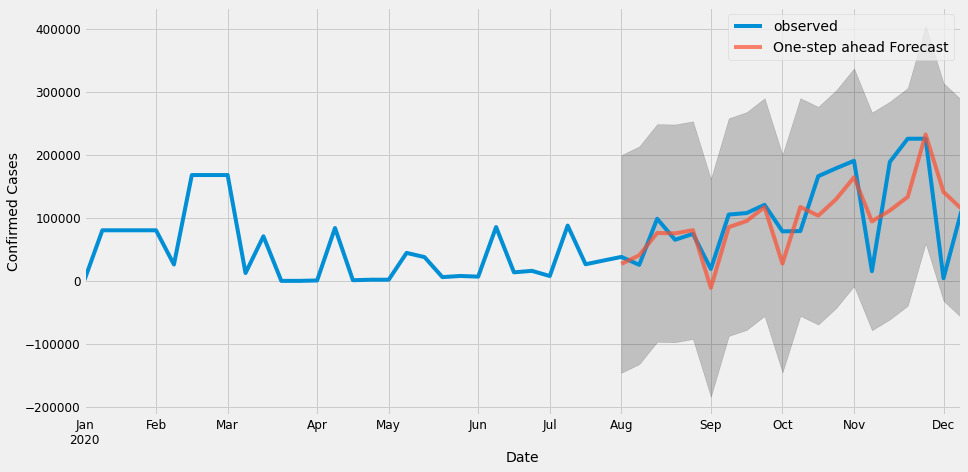

In [28]:
pred = results.get_prediction(start=pd.to_datetime('2020-08-02'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
plt.legend()
plt.show()

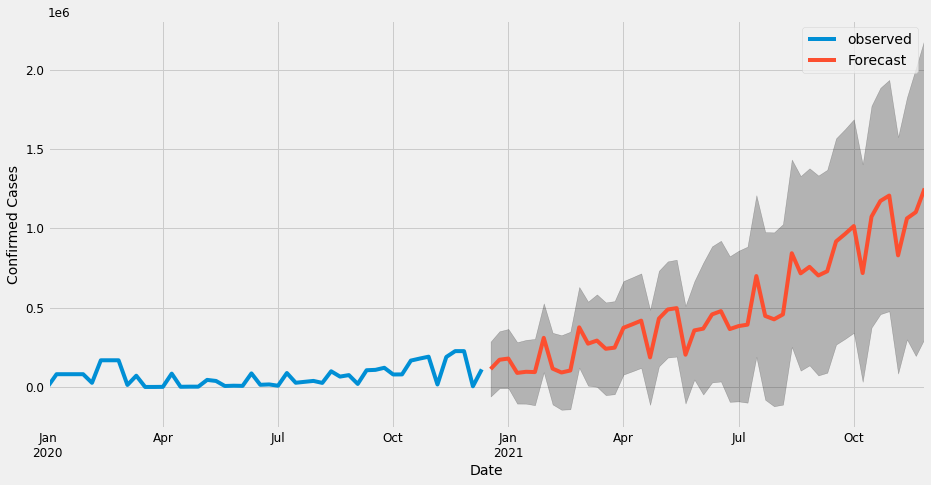

In [29]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
plt.legend()
plt.show()